In [1]:
import numpy as np
from nm_lib import nm_lib as nm
import threading

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Stabilities and accuracy in time. 

In [9]:
def u(x, A, W, xc):
    return A * (np.tanh((x+xc)/W) - np.tanh((x-xc)/W))

def shift_xx(xx, a, t, xf, x0):
    #let x-grid move with velocity a to the side and wrap around to other side
    #takes in the velocity a and the current time t. And end of grid xf and start x0
    xx_new = ((xx - a * t) - x0) % (xf - x0) + x0
    return xx_new

In [10]:
A = 0.02
xc = 0.70
W = 0.1
tf = 100

In [12]:
x0 = -2.6
xf = 2.6
#number of x-points
nump = 128
#number of t-points
nt = 100
#xgrid
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh = u(xx, A, W, xc)

Von Neumann stability analysis: derive conditions on the mesh parameters ∆x and ∆t such that the growth of the discrete solutions are bounded by the growth of the analytical solutions.

Assume peculiar solution on the form
$$ 
u_j^n = \xi^n e ^ {ikj\Delta x}.
$$
Inserting this in equation (3).

$$
\xi^{n+1} e^{ikj\Delta x} = \frac{1}{2}(\xi^n e ^ {ik(j+1)\Delta x} + \xi^n e ^ {ik(j-1)\Delta x})
- \frac{v\Delta t}{2\Delta x}(\xi^n e ^ {ik(j+1)\Delta x} - \xi^n e ^ {ik(j-1)\Delta x})
$$

$$
\xi^{n+1} e^{ikj\Delta x} = \xi^n e^{ikj\Delta x}\left[\frac{1}{2}( e ^ {ik\Delta x} +  e ^ {-ik\Delta x})
- \frac{v\Delta t}{2\Delta x}( e ^ {ik\Delta x} - e ^ {-ik\Delta x})\right]
$$

$$
\frac{\xi^{n+1}}{\xi^n} = \frac{1}{2}( e ^ {ik\Delta x} +  e ^ {-ik\Delta x})
- \frac{v\Delta t}{2\Delta x}( e ^ {ik\Delta x} - e ^ {-ik\Delta x})
$$

$$
\xi = \frac{1}{2}\left( \cos{(k\Delta x)} + i\sin{(k\Delta x)} + \cos{(k\Delta x)} - i\sin{(k\Delta x)} \right)
- \frac{v\Delta t}{2\Delta x}\left(\cos{(k\Delta x)} + i\sin{(k\Delta x)} - \cos{(k\Delta x)} +  i\sin{(k\Delta x)}  \right)
$$

$$
\xi = \cos{(k\Delta x)}
- i \frac{v\Delta t}{\Delta x}\sin{(k\Delta x)}
$$

We require that $|\xi^n|^2\leq 1$ for all $k$.

Then 

$$
|\cos{(k\Delta x)}
- i \frac{v\Delta t}{\Delta x}\sin{(k\Delta x)}|^2=\cos^2{(k\Delta x)} + \frac{v^2\Delta t^2}{\Delta x^2}\sin^2{(k\Delta x)}  \leq 1
$$

For this condition to hold for all $k$ and all $\Delta x$, we need to have
$$
\frac{v^2\Delta t^2}{\Delta x^2}\leq1.
$$
This gives
$$
\Delta t^2 \leq \frac{\Delta x ^2}{v^2}
$$

$$
\Delta t \leq \frac{\Delta x}{v}.
$$

## 1- Diffusive. 

Redo the exercise [ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and compare the two methods, i.e., one from 
[ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and the Lax-Method. 

Which one is more diffusive? Why? Rewrite Lax-method, so the right-hand side is as follows: 

$$\frac{u^{n+1}-u^{n}}{\Delta t} = ...$$

What is the reminder term look like? Is the order of convergence the same for the two methods? 

In [18]:
tt, unn = nm.evolv_uadv_burgers(xx, hh, nt, ddx=nm.deriv_upw, bnd_limits=[1,0])
tt_lax, uun_lax = nm.evolv_Lax_uadv_burgers(xx, hh, nt)

/Users/tabjone/Desktop/nm_lib/nm_lib/nm_lib.py:186: RuntimeWarning: divide by zero encountered in divide
  return np.min(np.gradient(x)/np.abs(a))


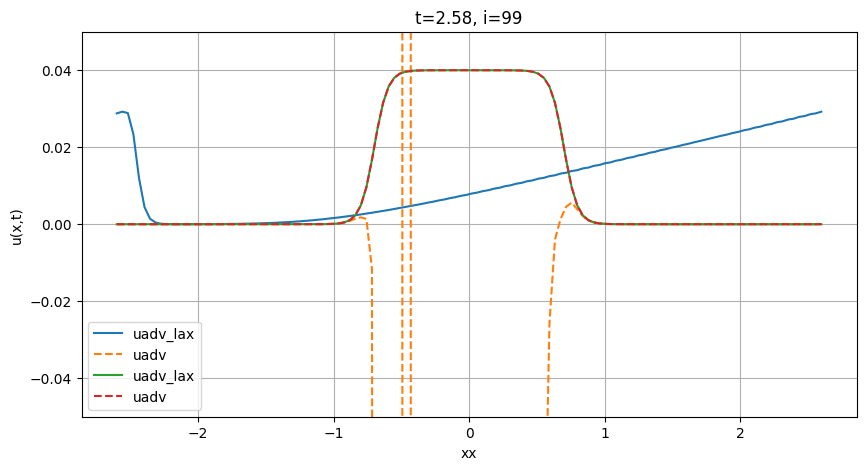

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

def init(): 
    axes.plot(xx,uun_lax[0,:], label="uadv_lax")
    axes.plot(xx,unn[0,:], label="uadv", linestyle="--")
    axes.legend()
    axes.set_ylim(-0.05, 0.05)
    axes.set_xlabel("xx")
    axes.set_ylabel("u(x,t)")
    axes.grid(True)
    
def animate(i):
    axes.clear()
    axes.plot(xx,uun_lax[i,:], label="uadv_lax")
    axes.plot(xx,unn[i,:], label="uadv",linestyle="--")
    axes.set_title('t={:.2f}, i={:g}'.format(tt[i],i))
    axes.grid(True)
    axes.set_xlabel("xx")
    axes.set_ylabel("u(x,t)")
    axes.legend()
    axes.set_ylim(-0.05, 0.05)

anim = FuncAnimation(fig, animate, interval=50, frames=nt, init_func=init)
HTML(anim.to_jshtml())

---

(\*) Equation (1) is, in fact, a shortened version of the full Burgers’ equation, which contains a viscosity term on the right-hand side, as follows:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.$$